In [1]:
import yaml
import sys
sys.path.append('../src')

from base_sindy import E_SINDy, BaseSINDy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/terrycox/UofUCode/ProbML/probml_cs6190/project/src/base_sindy.py


In [93]:
with open("../configs/config_sim.yaml", 'r') as stream:
    try:
        config=yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [94]:
config

{'mlflow': {'use_mlflow': False,
  'experiment_name': 'sindy_model',
  'run_name': 'sindy_base'},
 'data_path': 'other',
 'E_SINDy': {'n_models': 100,
  'point_ratio': 0.25,
  'optimizer': 'bayesian_ridge_regression',
  'random_seed': 42},
 'SINDy': {'poly_order': 5,
  'include_t': False,
  'include_poly_predictor': False,
  'order_predict': 0,
  'thresh': 0.0001,
  'alpha': 1,
  'k_spline': 3,
  'use_preprocessing': True,
  'interpolated_dt': 200},
 'derivative_method': 'one_pt',
 'stls_iterates': 5,
 'percent_thresh': 0.05,
 'smooth_coef': 0.5,
 'derivative_smooth_coef': 0.5,
 'bayesian_ridge_regression': {'lambda_': 0.5}}

In [95]:
if config['data_path'].endswith('massSpringData_blue_2_5.csv'):
    df = pd.read_csv(config['data_path'])[:100]
    m = df.to_numpy()
    t = m[:, 1]
    X = np.array([m[:, 3]])
elif 'tea' in config['data_path']:
    df = pd.read_csv(config['data_path'])
    df = df[df.time < 500]
    df = df[df.time > 7]
    df = df.iloc[list(range(0, len(df), 5))]
    m = df.to_numpy()
    t = m[:, 0]
    X = m[:, 1:].T
elif 'singleGreen200' in config['data_path']:
    df = pd.read_csv(config['data_path'])
    m = df.to_numpy()
    t = m[:, 0]
    X = m[:, 1:].T
else:
    
    t = np.linspace(0,25, 200)
    c0 = 1
    c1 = 1
    k = 0.25
    
    X = np.array([c0*np.cos(np.sqrt(k)*t)+c1*np.sin(np.sqrt(k)*t)])
    df = pd.DataFrame(np.array([t, X[0]]).T, columns=['t', 'x'])
t.shape, X.shape

((200,), (1, 200))

In [96]:
optimizer = config['E_SINDy']['optimizer']
sindy = BaseSINDy(config=config, **config['SINDy'], **config['mlflow'])

if optimizer == 'ridge':
    optimizer = sindy.ridge
    opti_vars = None
elif optimizer == 'lasso':
    optimizer = sindy.lasso
    opti_vars = None
elif optimizer == 'bayesian_ridge_regression':
    optimizer = sindy.bayesian_ridge_regression
    opti_vars = config['bayesian_ridge_regression']
else:
    optimizer = sindy.ridge
    opti_vars = None

coefs = sindy.fit(t, X, optimizer=optimizer, opti_vars=opti_vars, iterates=config['stls_iterates'])
print(sindy.coefs)

		 start spline...
		 spline done.
x_0
(10,)
Sigma [9.75073254e-03 1.93301132e-02 1.11818265e-01 2.08485003e-01
 4.96796182e-01 4.48488429e-01 7.06941071e-01 2.26461963e+00
 2.65560435e+01 1.97835225e+01]
Mean coefs [-0.13013577 -6.10349139  0.02301315  0.06143657  2.85754917 -1.30462237
  5.10871918 21.50570367  3.61642602 -6.6668972 ]
incorporating sigmas
coefs: [-0.13013577039692448, -6.103491385084073, 0, 0, 2.8575491730218197, -1.304622371011095, 5.108719177368473, 21.50570366974895, 0, 0]
precents: [0.00351621 0.16491367 0.         0.         0.07720973 0.03525033
 0.13803536 0.58107471 0.         0.        ] 1.0
(4,)
Sigma [0.01256698 0.00495778 0.19781588 0.48241044]
Mean coefs [-5.28232257  1.45057191  2.64711165 10.52587478]
incorporating sigmas
coefs: [-5.2823225652384895, 1.4505719144630014, 2.647111646194135, 10.525874783345595]
precents: [0.26536492 0.07287153 0.13298139 0.52878216] 1.0
(4,)
Sigma [0.01256698 0.00495778 0.19781588 0.48241044]
Mean coefs [-5.28232257  1.45

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

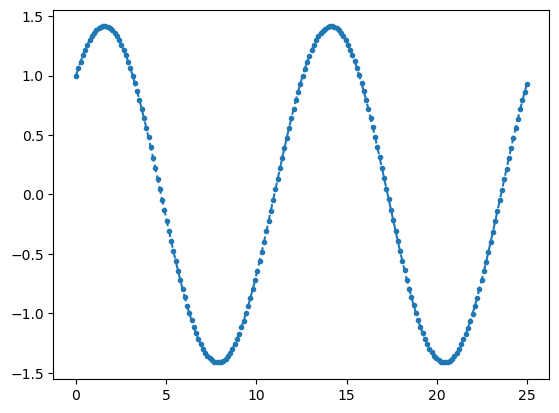

In [97]:
for x in X:
    plt.plot(t, x, '.--')
    # d1 = np.diff(x)/np.diff(t)
    # plt.plot(t[1:], d1, '.--')
    # plt.plot(t[2:], np.diff(d1)/np.diff(t[1:]), '.--')
#plt.title('Collected Mass Spring Data')
#plt.title('Tea Steeping Data (trial 12)')
# plt.title('Mass Spring Simulation (k=0.25)')
# plt.ylabel('position')
# plt.xlabel('time (s)')
# plt.savefig('./images/mass_spring_sim.png')
plt.show()

In [98]:
esindy = E_SINDy(config, **config['E_SINDy'], **config['mlflow'])

In [99]:
esindy.fit(t, X, **config['SINDy'], stls_iterates = config['stls_iterates'])

running iteration:  0
	 start sindy..
(50,) (1, 50)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [6.25804667e-03 1.81258593e-02 8.58003629e-02 1.08232548e-01
 3.28468837e-01 1.74667544e-01 8.19859873e-01 1.78615985e+00
 2.71601904e+01 1.89605791e+01]
Mean coefs [ 0.03416354 -6.97673878 -1.49235006 -1.26126151  4.65011139 -2.11069921
  2.02761128 28.58117847 20.14394426 -2.76096668]
incorporating sigmas
coefs: [0.03416353964139063, -6.976738784968456, -1.4923500556210423, -1.261261506080114, 4.650111393268961, -2.1106992085337777, 2.027611277125746, 28.5811784703318, 0, 0]
precents: [0.00072482 0.14801888 0.03166178 0.02675899 0.09865702 0.04478071
 0.04301791 0.60637988 0.         0.        ] 1.0
(3,)
Sigma [0.02411739 0.00460613 0.16227868]
Mean coefs [-4.95210302  1.11873639  5.87476914]
incorporating sigmas
coefs: [-4.952103019263232, 1.118736393818916, 5.874769142510472]
precents: [0.41455427 0.09365252 0.49179321] 1.0
(3,)
Sigma [0.02411739 0.00460613 0.16227868]
Mean coefs 

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

(4,)
Sigma [0.01260724 0.00944294 0.16452887 0.50423588]
Mean coefs [-5.1966095   1.08132286  2.08045259  9.88693865]
incorporating sigmas
coefs: [-5.196609498143728, 1.081322862172234, 2.0804525896377095, 9.886938646321857]
precents: [0.28481871 0.05926575 0.11402662 0.54188892] 1.0
(4,)
Sigma [0.01260724 0.00944294 0.16452887 0.50423588]
Mean coefs [-5.1966095   1.08132286  2.08045259  9.88693865]
	 sindy end.
running iteration:  15
	 start sindy..
(50,) (1, 50)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [0.00934818 0.01758992 0.09367179 0.1782766  0.29704936 0.21704085
 0.58283989 0.7454959  8.10945596 4.62781694]
Mean coefs [ 0.06887956 -5.89094684 -1.28585936 -0.28591081  3.28094458 -1.75031779
  1.262313   14.45995438  4.35877731 -4.52298939]
incorporating sigmas
coefs: [0.06887956121505912, -5.890946835799161, -1.2858593600753814, 0, 3.280944579251971, -1.7503177882953282, 1.2623130021490563, 14.459954376361285, 0, 0]
precents: [0.00246005 0.21039685 0.04592484 0.       

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

(2,)
Sigma [0.01659971 0.35963345]
Mean coefs [-4.70917241  7.80911145]
incorporating sigmas
coefs: [-4.709172413960981, 7.80911145195476]
precents: [0.37618355 0.62381645] 1.0
(2,)
Sigma [0.01659971 0.35963345]
Mean coefs [-4.70917241  7.80911145]
	 sindy end.
running iteration:  32
	 start sindy..
(50,) (1, 50)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [1.93472740e-03 2.28873606e-02 3.50174317e-02 3.55538736e-02
 1.54899817e-01 1.09159818e-01 8.88988120e-01 2.48070137e+01
 6.23896082e+01 1.49606517e+03]
Mean coefs [-2.15080018e-01 -4.24771696e+00  1.54888272e-01  1.64257749e-01
  3.47912993e+00 -2.10759654e+00  1.43943100e+01 -4.17723922e+01
 -6.20295944e+01  4.67984404e+02]
incorporating sigmas
coefs: [-0.21508001832642193, -4.247716960086517, 0.1548882719105083, 0.16425774882098348, 3.479129929610067, -2.107596541668604, 14.394309995911263, 0, 0, 0]
precents: [0.00868555 0.17153497 0.00625483 0.0066332  0.14049723 0.08511078
 0.58128344 0.         0.         0.        ] 0.

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

(6,)
Sigma [0.00862455 0.0255966  0.00964275 0.05061388 0.11568739 0.37250157]
Mean coefs [-5.06348285  0.39291893  1.42866993 -0.35088281  2.40491655 10.56850494]
incorporating sigmas
coefs: [-5.063482851880661, 0.3929189286235343, 1.4286699268780871, -0.35088281339240535, 2.4049165507828896, 10.568504941573307]
precents: [0.25055117 0.01944241 0.07069342 0.01736238 0.11900004 0.52295058] 1.0
(4,)
Sigma [0.0088069  0.00385782 0.10489833 0.36197251]
Mean coefs [-5.05274761  1.43382846  2.72027555 10.81096878]
incorporating sigmas
coefs: [-5.0527476057559095, 1.433828462220199, 2.7202755490301582, 10.810968776474605]
precents: [0.25241248 0.0716276  0.13589269 0.54006723] 1.0
(4,)
Sigma [0.0088069  0.00385782 0.10489833 0.36197251]
Mean coefs [-5.05274761  1.43382846  2.72027555 10.81096878]
incorporating sigmas
coefs: [-5.0527476057559095, 1.433828462220199, 2.7202755490301582, 10.810968776474605]
precents: [0.25241248 0.0716276  0.13589269 0.54006723] 1.0
(4,)
Sigma [0.0088069  0.0038

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

(5,)
Sigma [0.02007792 0.05484276 0.03456229 0.09995023 0.33515901]
Mean coefs [-5.57199503  2.61784069 -1.77204549  2.77943155  9.73855936]
incorporating sigmas
coefs: [-5.571995028247109, 2.617840690044611, -1.7720454929397635, 2.779431550437674, 9.738559363956522]
precents: [0.24786596 0.11645265 0.07882809 0.1236409  0.4332124 ] 1.0
(5,)
Sigma [0.02007792 0.05484276 0.03456229 0.09995023 0.33515901]
Mean coefs [-5.57199503  2.61784069 -1.77204549  2.77943155  9.73855936]
incorporating sigmas
coefs: [-5.571995028247109, 2.617840690044611, -1.7720454929397635, 2.779431550437674, 9.738559363956522]
precents: [0.24786596 0.11645265 0.07882809 0.1236409  0.4332124 ] 1.0
(5,)
Sigma [0.02007792 0.05484276 0.03456229 0.09995023 0.33515901]
Mean coefs [-5.57199503  2.61784069 -1.77204549  2.77943155  9.73855936]
	 sindy end.
running iteration:  73
	 start sindy..
(50,) (1, 50)
		 start spline...
		 spline done.
x_0
(10,)
Sigma [9.72221226e-03 2.70215426e-02 1.36164781e-01 1.75518970e-01
 6.

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

x_0
(10,)
Sigma [4.70387942e-03 1.24716740e-02 3.78257051e-02 1.13643580e-01
 1.08375471e-01 1.51924938e-01 4.51957844e-01 2.70761273e+00
 1.57325292e+01 3.61297618e+01]
Mean coefs [-0.37185484 -5.84941026 -0.45345677  1.17719091  2.67750086 -1.79520027
  2.7953192  17.77328628  0.49997566 -7.68181192]
incorporating sigmas
coefs: [-0.3718548392611905, -5.849410257579013, -0.45345676841902405, 1.1771909051742473, 2.6775008617775864, -1.7952002744738262, 2.7953192011326946, 17.773286280612087, 0, 0]
precents: [0.01130491 0.17783028 0.01378572 0.03578825 0.08139978 0.05457661
 0.08498162 0.54033283 0.         0.        ] 1.0
(5,)
Sigma [0.00953319 0.00979514 0.00814267 0.08779118 0.72665728]
Mean coefs [-5.75648326  2.12971496 -0.88801617  3.42782381 15.46495263]
incorporating sigmas
coefs: [-5.756483256045943, 2.1297149626803478, -0.8880161720270431, 3.4278238130005105, 15.464952627938674]
precents: [0.20806322 0.07697675 0.03209659 0.12389579 0.55896764] 1.0
(4,)
Sigma [0.01315336 0.002

/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/terrycox/.conda/envs/numericalI/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

{'x_0': {'mean': {'dx_0': 0.0,
   'dxx_0': -5.261398127795487,
   'dx_0^2': -0.010541540040761237,
   'dx_0^3': -0.003123633544933321,
   'dx_0^4': 0.9997321134497732,
   'dx_0^5': -0.15681263932983497,
   'dxx_0^2': 2.35614261807574,
   'dxx_0^3': 10.73698855373151,
   'dxx_0^4': 0.0,
   'dxx_0^5': -0.15618786106893187},
  'std': {'dx_0': 0.0,
   'dxx_0': 0.4836961407146584,
   'dx_0^2': 0.2052286810204781,
   'dx_0^3': 0.12942763012229608,
   'dx_0^4': 0.8935036437340554,
   'dx_0^5': 0.5626304982559602,
   'dxx_0^2': 2.018364815970701,
   'dxx_0^3': 5.195668537911552,
   'dxx_0^4': 0.0,
   'dxx_0^5': 1.5618786106893183},
  'df':     dx_0     dxx_0  dx_0^2  dx_0^3    dx_0^4    dx_0^5   dxx_0^2    dxx_0^3  \
  0      0 -4.952103     0.0     0.0  1.118736  0.000000  0.000000   5.874769   
  1      0 -5.294792     0.0     0.0  1.265968  0.000000  3.106236  10.981552   
  2      0 -5.257189     0.0     0.0  1.215443  0.000000  2.284054  10.238353   
  3      0 -5.579057     0.0     0.0  

In [107]:
headers = esindy.coefs['x_0']['mean'].keys()
data = {'mean' : np.round(esindy.coefs['x_0']['mean'].values(), 2), 'std' : list(esindy.coefs['x_0']['std'].values())}

textabular = f"l|{'r'*len(headers)}"
texheader = " & " + " & ".join(headers) + "\\\\"
texdata = "\\hline\n"
for label in sorted(data):
   if label == "z":
      texdata += "\\hline\n"
   texdata += f"{label} & {' & '.join(map(str,data[label]))} \\\\\n"

print("\\begin{tabular}{"+textabular+"}")
print(texheader)
print(texdata,end="")
print("\\end{tabular}")

\begin{tabular}{l|rrrrrrrrrr}
 & dx_0 & dxx_0 & dx_0^2 & dx_0^3 & dx_0^4 & dx_0^5 & dxx_0^2 & dxx_0^3 & dxx_0^4 & dxx_0^5\\
\hline
mean & 0.0 & -5.261398127795487 & -0.010541540040761237 & -0.003123633544933321 & 0.9997321134497732 & -0.15681263932983497 & 2.35614261807574 & 10.73698855373151 & 0.0 & -0.15618786106893187 \\
std & 0.0 & 0.4836961407146584 & 0.2052286810204781 & 0.12942763012229608 & 0.8935036437340554 & 0.5626304982559602 & 2.018364815970701 & 5.195668537911552 & 0.0 & 1.5618786106893183 \\
\end{tabular}


In [100]:
a = np.array(list(esindy.coefs['x_0']['mean'].values()))
np.abs(a)/np.sum(np.abs(a))

array([0.00000000e+00, 2.67334872e-01, 5.35622128e-04, 1.58713740e-04,
       5.07970031e-02, 7.96774657e-03, 1.19717054e-01, 5.45552987e-01,
       0.00000000e+00, 7.93600120e-03])

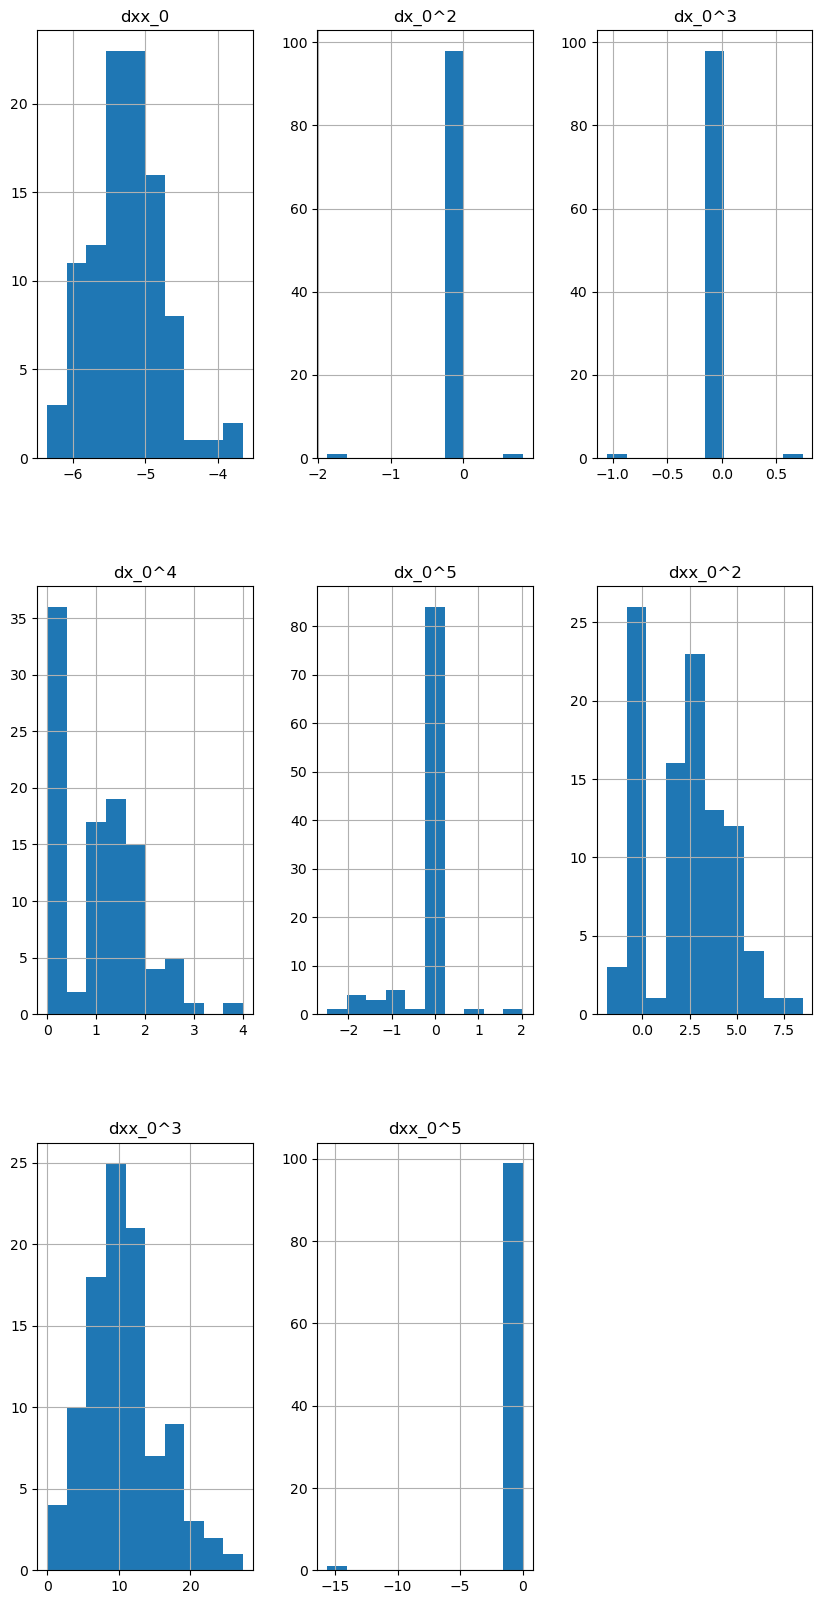

In [101]:
df_coefs = esindy.coefs['x_0']['df']
df_coefs[[a for a in df_coefs.columns if np.sum(np.abs(df_coefs[a])) > 0.0001]].hist(figsize=(10,20))
plt.show()

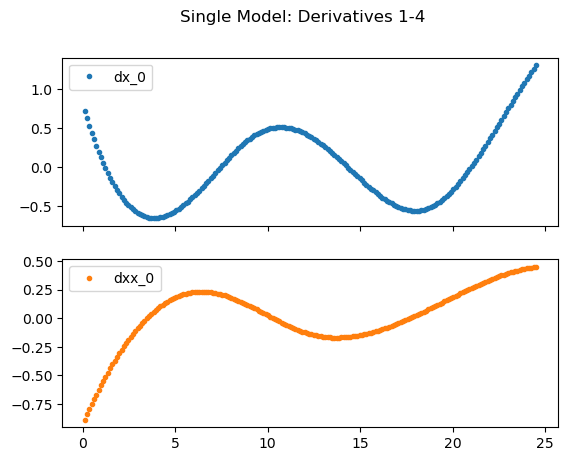

In [102]:
esindy.all_dfs[0][[k for k, v in esindy.coefs['x_0']['mean'].items() if '^' not in k]].plot(subplots=True, style='.')
plt.suptitle('Single Model: Derivatives 1-4')
plt.savefig('./images/single_model.png')
plt.show()

In [103]:
esindy.all_dfs[0]

,dx_0,dxx_0,dx_0^2,dx_0^3,dx_0^4,dx_0^5,dxx_0^2,dxx_0^3,dxx_0^4,dxx_0^5
0.125628,0.723773,-0.889372,0.523847,0.379147,0.274416,0.198615,0.790983,-0.703478,0.625653,-0.556439
0.249362,0.625557,-0.843425,0.391321,0.244794,0.153132,0.095793,0.711365,-0.599983,0.506040,-0.426807
0.373097,0.531457,-0.798525,0.282447,0.150109,0.079776,0.042398,0.637642,-0.509173,0.406588,-0.324671
0.496831,0.441419,-0.754668,0.194851,0.086011,0.037967,0.016759,0.569524,-0.429801,0.324357,-0.244782
0.620565,0.355386,-0.711848,0.126299,0.044885,0.015952,0.005669,0.506727,-0.360713,0.256772,-0.182783
...,...,...,...,...,...,...,...,...,...,...
24.006338,1.129884,0.436063,1.276638,1.442453,1.629805,1.841491,0.190151,0.082918,0.036157,0.015767
24.130072,1.175188,0.439863,1.381066,1.623011,1.907342,2.241485,0.193480,0.085105,0.037434,0.016466
24.253807,1.219818,0.443317,1.487956,1.815035,2.214012,2.700691,0.196530,0.087125,0.038624,0.017123
24.377541,1.263710,0.446417,1.596964,2.018099,2.550293,3.222831,0.199288,0.088966,0.039716,0.017730


In [105]:
n_models = config['E_SINDy']['n_models']
for col in esindy.coefs['x_0']['df'].columns:
    non_zero = [v for v in esindy.coefs['x_0']['df'][col] if np.abs(v) > esindy.thresh]
    
    print(f'{col} (count non-zeros: {len(non_zero)}/{n_models})')
    

dx_0 (count non-zeros: 0/100)
dxx_0 (count non-zeros: 100/100)
dx_0^2 (count non-zeros: 2/100)
dx_0^3 (count non-zeros: 2/100)
dx_0^4 (count non-zeros: 64/100)
dx_0^5 (count non-zeros: 16/100)
dxx_0^2 (count non-zeros: 74/100)
dxx_0^3 (count non-zeros: 96/100)
dxx_0^4 (count non-zeros: 0/100)
dxx_0^5 (count non-zeros: 1/100)


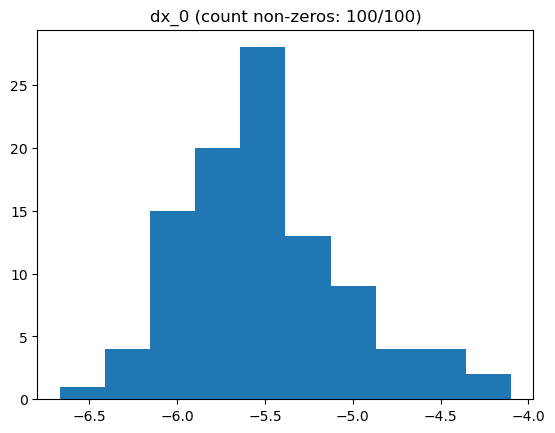

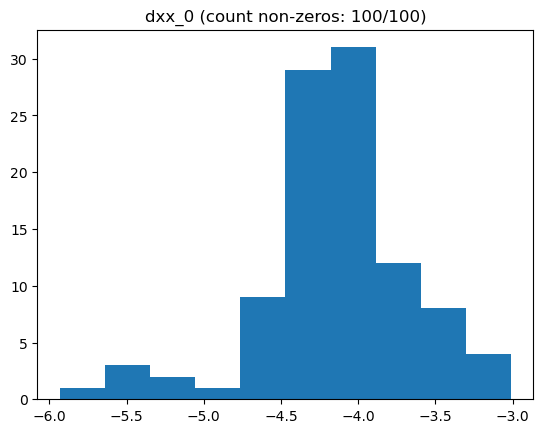

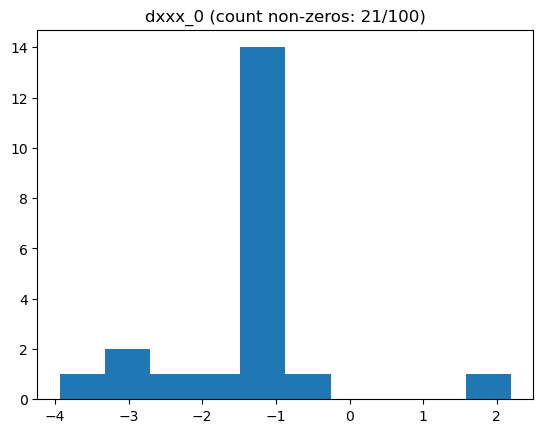

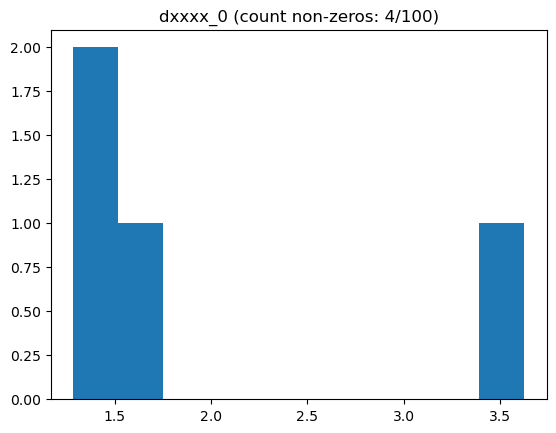

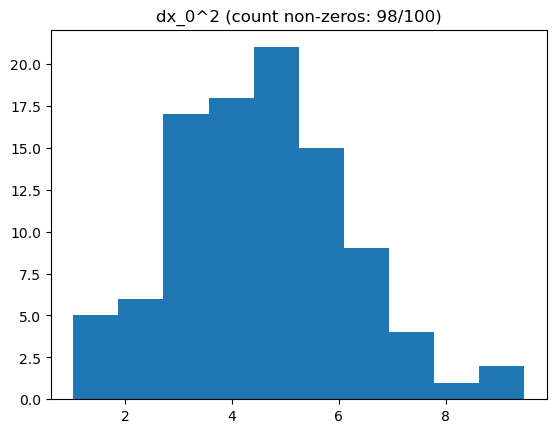

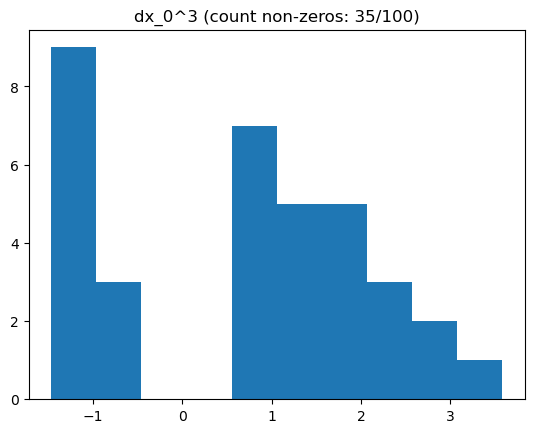

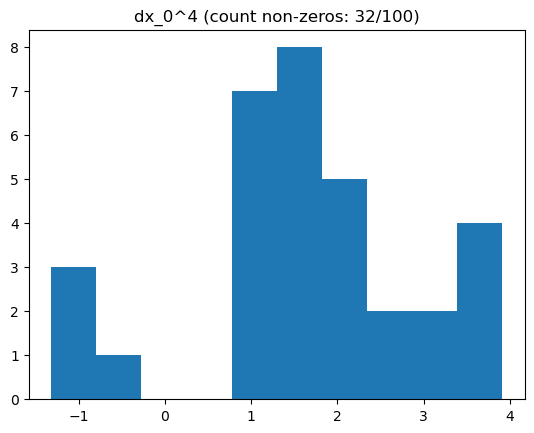

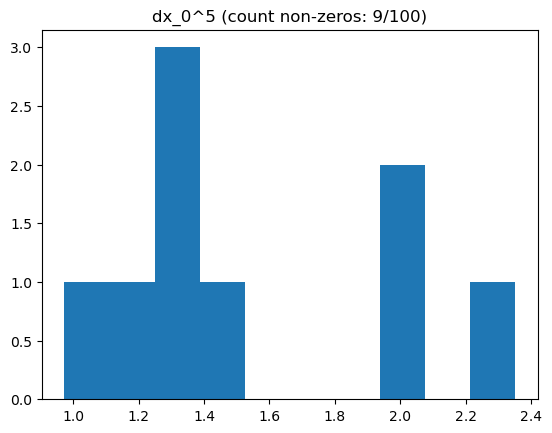

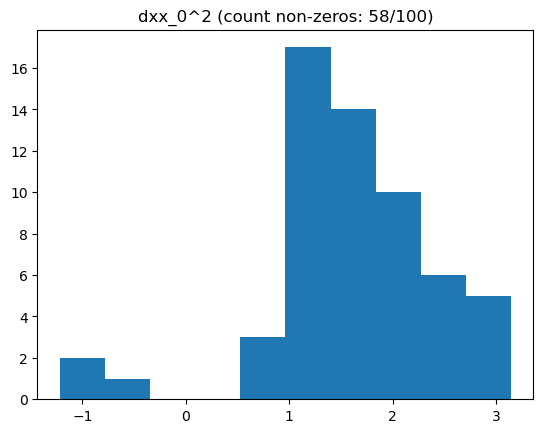

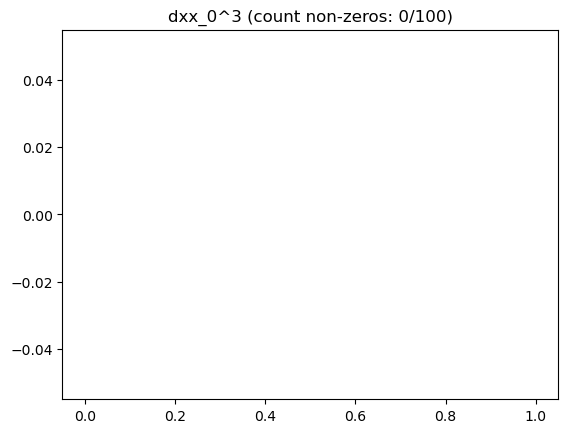

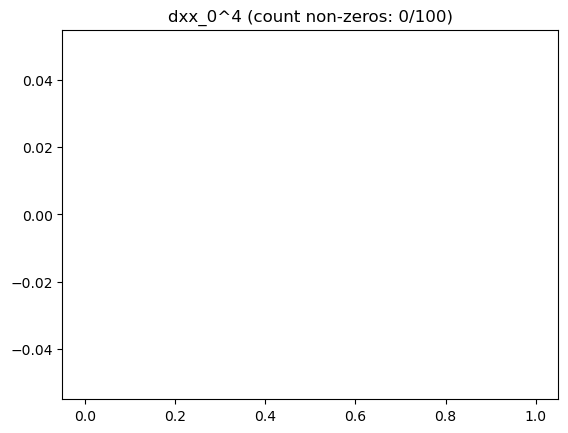

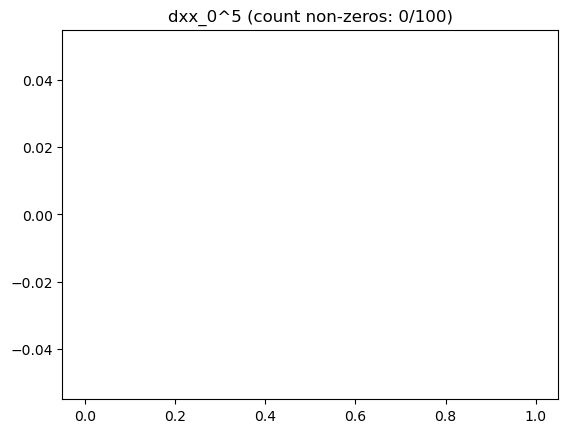

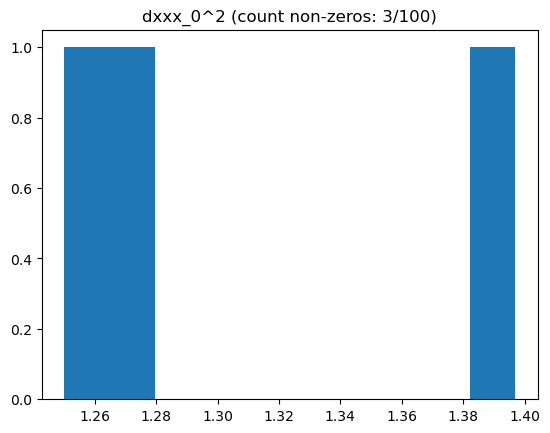

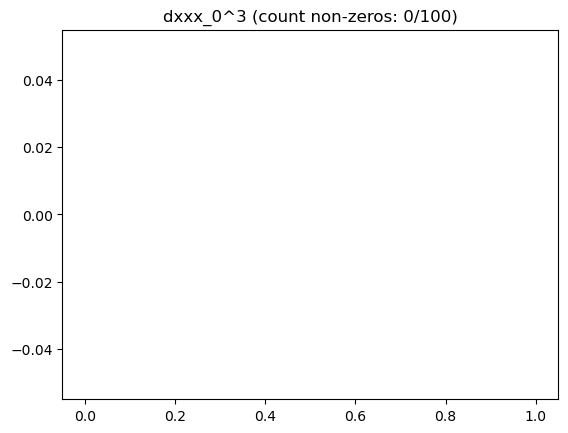

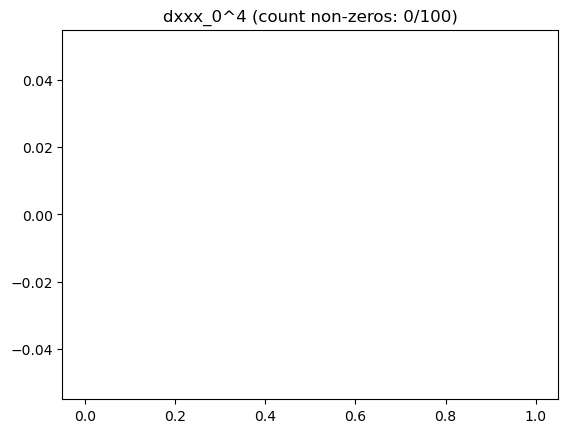

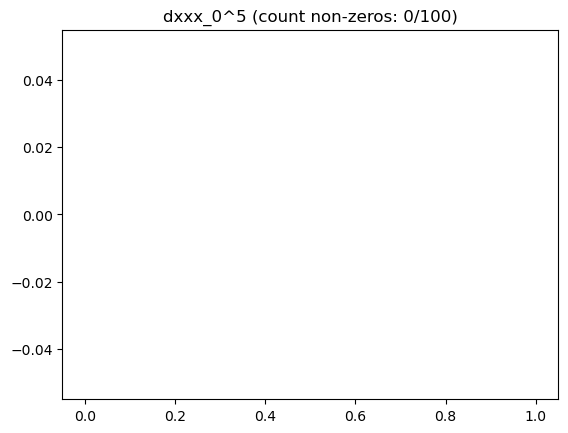

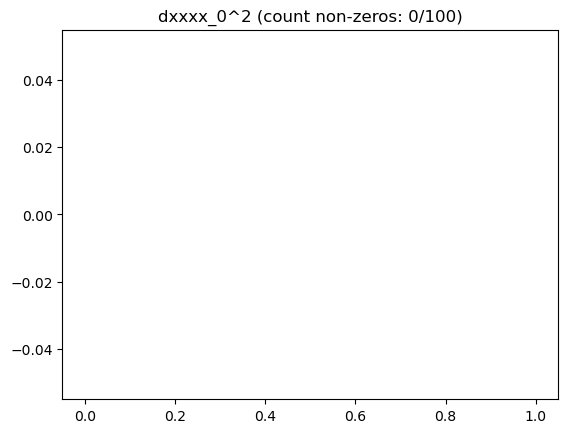

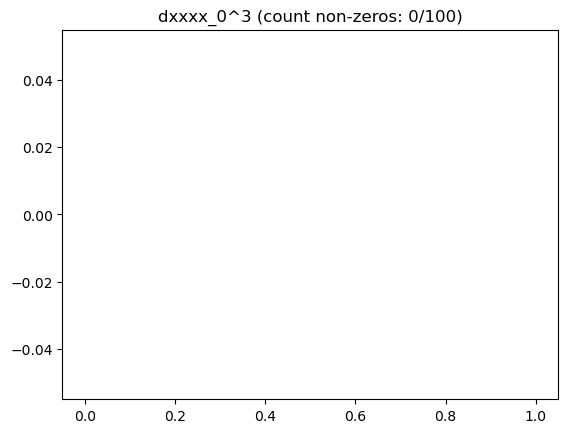

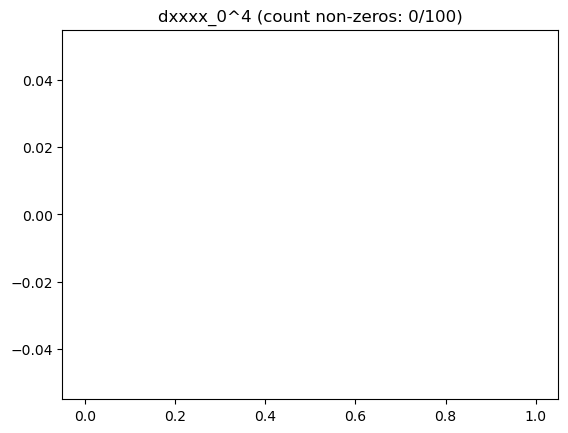

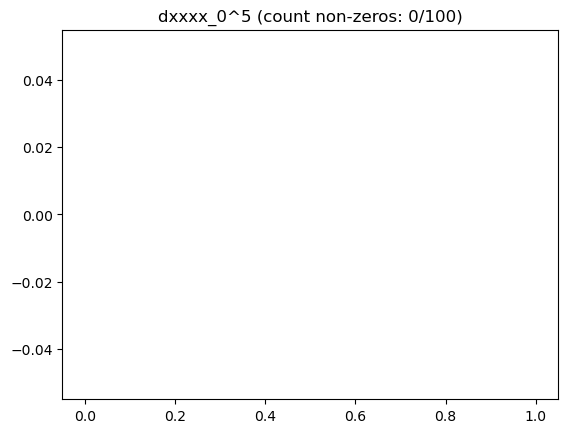

In [81]:
n_models = config['E_SINDy']['n_models']
for col in esindy.coefs['x_0']['df'].columns:
    non_zero = [v for v in esindy.coefs['x_0']['df'][col] if np.abs(v) > esindy.thresh]
    plt.hist(non_zero)
    plt.title(f'{col} (count non-zeros: {len(non_zero)}/{n_models})')
    plt.show()

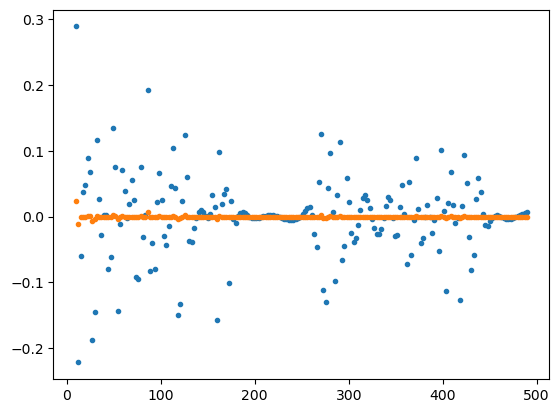

In [79]:
plt.plot(esindy.all_dfs[0].index, esindy.all_dfs[0].dxx_0, '.')
plt.plot(esindy.all_dfs[0].index, esindy.all_dfs[0]['dxx_0^3'], '.')
plt.show()